# Latar Belakang

Perusahaan e-Commerce terbesar di Pakistan ingin meningkatkan profit dengan meningkatkan jumlah order telah dibuat oleh para user-nya. Tetapi, tidak semua order yang telah dibuat oleh user dapat selesai atau complete.

# Peryataan Masalah

Perusahaan ingin mengetahui **apa faktor yang mempengaruhi sehingga user dapat membatalkan order-nya**. Setelah mengetahui faktor yang mempengaruhi tersebut, perusahaan berharap dapat mengurangi tingkat pembatalan yang dilakukan oleh user agar jumlah order yang selesai atau complete dapat meningkat. Sehingga, profit yang didapat perusahaan juga meningkat.

Dengan pernyataan masalah di atas, maka kita diharapkan dapat menjawab pertanyaan berikut:
**Apa Faktor yang paling terpenting dalam mempengaruhi tindakan user dalam melakukan pembatalan order?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa dataset yang sudah dibuat oleh perusahaan.

Pertama-tama, kita import terlebih dahulu module yang dibutuhkan untuk mengerjakan kasus diatas dengan python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini secara umum adalah kumpulan dari order yang dibuat oleh para user dalam site e-Commerce perushaan.
Terdapat 26 column secara total, dengan 5 column yang tidak terdapat data apapun. 5 column ini nantinya akan dihapus saja karena tidak dapat digunakan.
Berikut list column yang ada berserta penjelasan singkatnya: 
(ada beberapa variable/column yang tidak dapat dijelaskan karena minimnya domain knowledge)

1. item_id : Urutan order yang ada dalam e-Commerce perusahaan
2. status : Status terakhir dari order yang dibuat oleh user
3. created_at : Kapan order tersebut dibuat oleh user
4. sku : Nama barang yang diorder oleh user
5. price : Harga barang yang diorder oleh user
6. qty_ordered : Jumlah barang yang diorder oleh user
7. grand_total : price*qty_ordered
8. increment_id : ID order yang dibuat oleh user
9. category_name_1 : Kategori dari barang yang diorder oleh user
10. sales_commission_code : Kode link seperti referral oleh beberapa user
11. discount_amount : Diskon yang diberikan untuk order yang dibuat oleh user
12. payment_method : Metode pembayaran yang dipilih oleh user
13. Working Date : Kapan order tersebut dieksekusi dan dilanjutkan ke halaman pembayaran
14. BI Status : -
15. MV : -
16. Year : Tahun kapan order tersebut dibuat oleh user
17. Month : Bulan kapan order tersebut dibuat oleh user
18. Customer Since : Sejak kapan user bergabungan dengan e-Commerce perusahaan
19. M-Y : Gabunagan antar Month dan Year
20. FY : Tahun finansial perusahaan e-Commerce
21. Customer ID : ID unik untuk setiap user
 
Berikut 5 baris teratas dan terbawah dari dataset Pakistan Largest Ecommerce Dataset.

In [2]:
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
display(df.head(),df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding and Cleaning
Sebelum melakukan analisis pada data, kita perlu memahami terlebih dahulu bentuk dari dataset. Tahap ini disebut dengan **data understanding**, dimana kita harus tahu anomali yang ada dalam dataset. Setelah itu kita harus melakukan beberapa tindakan yang diperlukan untuk mengatasi anomali-anomali tersebut, dan tahap ini disebut dengan **data cleaning**.

Pertama, mari kita lihat informasi dari dataset Pakistan Largest Ecommerce Dataset.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (1048575, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524

In [4]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


In [5]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

Notes:
1. Pada Tail, terdapat banyak row tidak memiliki data sama sekali
2. RangeIndex vs Non-null count = 1,048,575 vs 584,524, secara sekilas terdapat +- 460,000 missing value pada setiap column
3. Terdapat column yang tidak memiliki nama dan data sama sekali

# Missing Value

**1. Menangani Row dan Column yang hanya terdiri dari missing value**

Secara sekilas, kita dapat melihat bahwa terdapat banyak missing value. Ini dapat dilihat melalui RangeIndex (1,048,575) vs Non-null count (Modus : 584524).
Mari kita lihat seberapa banyak missing value dari masing masing column:

In [6]:
# Menampilkan umlah data dengan missing value dari masing masing column
df.isna().sum()

item_id                  464051 
status                   464066 
created_at               464051 
sku                      464071 
price                    464051 
qty_ordered              464051 
grand_total              464051 
increment_id             464051 
category_name_1          464215 
sales_commission_code    601226 
discount_amount          464051 
payment_method           464051 
Working Date             464051 
BI Status                464051 
 MV                      464051 
Year                     464051 
Month                    464051 
Customer Since           464062 
M-Y                      464051 
FY                       464051 
Customer ID              464062 
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

Setelah di-check, selain banyaknya missing value, kita juga menemukan column yang tidak memiliki data sama sekali.
Pertama kita akan menghilangkan column column tersebut:

In [7]:
df1 = df.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df1.isna().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601226
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

Angka angka di atas menunjukan bahwa terdapat banyak missing value dari setiap column. Sebelumnya juga kita bisa melihat tail pada dataset,
terdapat row yang tidak memiliki data sama sekali atau row yang hanya terdiri dari missing value saja. Maka dari itu kita delete saja agar hanya
tersisa row yang memiliki data.

In [8]:
df2 = df1.dropna (axis=0, how='all')
df2.isna().sum()

item_id                  0     
status                   15    
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category_name_1          164   
sales_commission_code    137175
discount_amount          0     
payment_method           0     
Working Date             0     
BI Status                0     
 MV                      0     
Year                     0     
Month                    0     
Customer Since           11    
M-Y                      0     
FY                       0     
Customer ID              11    
dtype: int64

Setelah mengatasi row dan column yang tidak memiliki data sama sekali, kita dapat melihat bahwa hanya beberapa column saja yang memiliki missing value.
Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value untuk column Sales_commission_code cukup tinggi (137,175).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

In [9]:
display(df2.head(),df2.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0


Dari data di atas, kita hanya berfokus pada column column yang berkaitan dengan pernyataan permasalahan.

Berikut column yang akan kita analisis nantinya:
1. status : terdapat data complete order dan cancel order dimana kita nantinya akan menganalisis variable/column mana yang sangat mempengaruhi rate cancel order yang terjadi.
2. category_name_1 : variable pertama yang akan digunakan untuk menganilisis pengaruhnya terhadap cancel order, karena ada kemungkinan kategori tertentu memiliki tingkat cancel order yang tinggi.
3. sales_commission_code : variable kedua ini ada kemungkinan untuk mempengaruhi tingkat cancel order. Misal, tingkat cancel lebih tinggi jika transaksi yang terjadi tidak memiliki referral code.
4. discount_amount : variable selanjutnya ini akan digunakan dengan pertimbangan, jika ada discount maka user cenderung tidak membatalkan order yang dieksekusi.
5. payment_method : variable ini merupakan variable terakhir yang digunakan dengan pertimbangan bahwa metode pembayaran tertentu dapat mempengaruhi tingkat pembatalan transaksi.

**2. status**

status merupakan column yang penting karena terdapat data 'canceled' yang kita perlu kita analisis sesuai dengan pernyataan sebelumnya. Maka kita check dulu datanya apakah ada yang perlu diubah atau tidak.

In [10]:
display(df2['status'].value_counts())

complete          233685
canceled          201249
received          77290 
order_refunded    59529 
refund            8050  
cod               2859  
paid              1159  
closed            494   
payment_review    57    
pending           48    
processing        33    
holded            31    
fraud             10    
pending_paypal    7     
exchange          4     
\N                4     
Name: status, dtype: int64

Jika dilihat, terdapat value \N dimana value ini dapat kita katakan sebagai missing value. Pertama tama mari kita ubah dulu datanya menjadi NaN dan karena jumlahnya sedikit, kita dapat menhapusnya saja.

In [11]:
# Merubah value \N menjadi missing value
df2['status'] = df2['status'].replace('\\N',None)

df2.dropna(subset=['status'],inplace=True)

display(df2['status'].value_counts())

complete          233685
canceled          201249
received          77290 
order_refunded    59529 
refund            8050  
cod               2859  
paid              1159  
closed            494   
payment_review    57    
pending           48    
processing        33    
holded            31    
fraud             10    
pending_paypal    7     
exchange          4     
Name: status, dtype: int64

Setelah melihat data di atas, mari kita kategorikan transaksi yang berpotensi merugikan perusahaan dan mana yang berpotensi menguntungkan perusahaan.
Merugikan dapat kita asumsikan bahwa transaksi tersebut masih ada kemungkinan kalau transaksi tersebut batal.
Sebaliknya, menguntungkan kita asumsikan bahwa transaksi tersebut besar kemungkinannya untuk complete.

Merugikan :
1. canceled
2. order_refunded
3. refund
4. payment_review
5. pending
6. processing
7. holded
8. fraud
9. pending_paypal

Menguntungkan :
1. complete
2. received
3. cod
4. paid
5. closed
6. exchange

Untuk yang merugikan, kita akan ganti valuenya menjadi Loss

Untuk yang menguntungkan, kita akan ganti valuenya menjadi Profitable

In [12]:
df2.loc[(df2['status'].isin(['canceled','order_refunded','refund','payment_review','pending','processing','holded','fraud','pending_paypal'])),'status']='Loss'

df2.loc[(df2['status'].isin(['complete','received','cod','paid','closed','exchange'])),'status']='Profitable'

display(df2['status'].value_counts())

Profitable    315491
Loss          269014
Name: status, dtype: int64

**3. category_name_1**

Sebelum itu, mari kita check dulu values yang ada pada category_name_1

In [13]:
display(df2['category_name_1'].value_counts())

Mobiles & Tablets     115709
Men's Fashion         92220 
Women's Fashion       59721 
Appliances            52413 
Superstore            43611 
Beauty & Grooming     41495 
Soghaat               34011 
Others                29214 
Home & Living         26504 
Entertainment         26325 
Health & Sports       17502 
Kids & Baby           16489 
Computing             15933 
\N                    7846  
School & Education    3478  
Books                 1870  
Name: category_name_1, dtype: int64

Sama seperti kasus pada column column sebelumnya bahwa terdapat values \N. Kali ini kita dapat menyimpulkan bahwa item yang tidak memiliki category name bisa di masukan saja ke category name 'Others'.

In [14]:
df2['category_name_1'] = df2['category_name_1'].replace('\\N','Others')
display(df2['category_name_1'].value_counts())

Mobiles & Tablets     115709
Men's Fashion         92220 
Women's Fashion       59721 
Appliances            52413 
Superstore            43611 
Beauty & Grooming     41495 
Others                37060 
Soghaat               34011 
Home & Living         26504 
Entertainment         26325 
Health & Sports       17502 
Kids & Baby           16489 
Computing             15933 
School & Education    3478  
Books                 1870  
Name: category_name_1, dtype: int64

In [15]:
df2.isna().sum()

item_id                  0     
status                   0     
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category_name_1          164   
sales_commission_code    137160
discount_amount          0     
payment_method           0     
Working Date             0     
BI Status                0     
 MV                      0     
Year                     0     
Month                    0     
Customer Since           11    
M-Y                      0     
FY                       0     
Customer ID              11    
dtype: int64

Untuk sisa missing value-nya yang tinggal sedikit, kita memasukkanya ke 'Others' juga.

In [16]:
df2[['category_name_1']] = df2[['category_name_1']].fillna('Others')
df2.isna().sum()

item_id                  0     
status                   0     
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category_name_1          0     
sales_commission_code    137160
discount_amount          0     
payment_method           0     
Working Date             0     
BI Status                0     
 MV                      0     
Year                     0     
Month                    0     
Customer Since           11    
M-Y                      0     
FY                       0     
Customer ID              11    
dtype: int64

Dengan begini, tidak ada lagi missing value dalam column **category_name_1**. Mari kita lanjutkan untuk menangani missing value di column yang lainnya.

**4. sales_commission_code**

Untuk sales comission code, kita dapat melihat dulu apa saja value yang terdapat dalam column ini seperti di bawah ini:

In [17]:
display(df2['sales_commission_code'].value_counts())
display(df2['sales_commission_code'].isna().sum())
display(df2['sales_commission_code'])

\N                338997
40968             2710  
C-LHW-50074       2434  
C-RWP-31924       1720  
cisb30211         1613  
                  ...   
100278139         1     
rwp-wah-104124    1     
C-FSD-42199       1     
Cfsd43702         1     
C LHE 45016       1     
Name: sales_commission_code, Length: 7226, dtype: int64

137160

0         \N         
1         \N         
2         \N         
3         R-FSD-52352
4         \N         
          ..         
584519    NaN        
584520    NaN        
584521    NaN        
584522    NaN        
584523    NaN        
Name: sales_commission_code, Length: 584505, dtype: object

Berdasarkan hasil data untuk column sales_commission_code, kita dapat menyimpulkan beberapa hal sebagai berikut:
1.  Terdapat value \N, dimana ini merupakan value yang paling sering muncul. Kita juga dapat menganggap bahwa value ini merupakan value yang sama dengan NaN atau missing value.
    Alasan lain mengapa kita dapat menganggap \N merupakan missing value karena cukup tidak memungkinkan setengah dari total transaksi yang terjadi dalam e-commerce ini memakai kode referral. Secara persentase \N mendominasi +-57% dari total transaksi yang ada.
2.  Terdapat missing value sebanyak 137,175 row.

Dengan hasil ini kita dapat merubah column sales_commission_code menjadi boolean dimana isinya adalah:
1.  Jika ada commision code maka menjadi True
2.  Jika tidak ada commission code maka menjadi False, termasuk data \N juga akan menjadi False

In [18]:
# Merubah value \N menjadi missing value
df2['sales_commission_code'] = df2['sales_commission_code'].replace('\\N',None)

# Merubah value dalam column sales_commission_code menjadi boolean (True or False)
df2['sales_commission_code'] = pd.notna(df2['sales_commission_code'])

df2

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,Profitable,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,False,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,Loss,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,False,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,Loss,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,False,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,Profitable,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,True,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,Loss,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,False,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,Profitable,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,False,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,Loss,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,False,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,Loss,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,False,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,Loss,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,False,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [19]:
display(df2['sales_commission_code'].value_counts())

False    476157
True     108348
Name: sales_commission_code, dtype: int64

In [20]:
df2.isna().sum()

item_id                  0 
status                   0 
created_at               0 
sku                      20
price                    0 
qty_ordered              0 
grand_total              0 
increment_id             0 
category_name_1          0 
sales_commission_code    0 
discount_amount          0 
payment_method           0 
Working Date             0 
BI Status                0 
 MV                      0 
Year                     0 
Month                    0 
Customer Since           11
M-Y                      0 
FY                       0 
Customer ID              11
dtype: int64

Dengan begini, sales_comission_code tidak memiliki data missing value. Kita dapat melanjutkan untuk menangani anomali di column yang lainnya.

**5. discount_amount**

Pertama tama, mari kita lihat value apa saja yang terdapat dalam column discount_amount

In [21]:
display(df2['discount_amount'].value_counts())

0.00       376288
1000.00    5426  
2000.00    4143  
500.00     3648  
200.00     3495  
           ...   
60.94      1     
46.32      1     
66.32      1     
72.63      1     
355.35     1     
Name: discount_amount, Length: 28058, dtype: int64

Jika dilihat, terdapat data angka discount pada setiap transaksi. Kita dapat mengubah datanya menjadi tipe boolean dimana angka discount "0.00" adalah transaksi tanpa discount dan selain itu merupakan transaksi dengan discount.

In [22]:
df2.loc[df2['discount_amount'] == 0.00, 'discount_amount'] = "Not discounted"
df2.loc[df2['discount_amount'] != "Not discounted", 'discount_amount'] = "Discounted"

display(df2['discount_amount'].value_counts())

Not discounted    376288
Discounted        208217
Name: discount_amount, dtype: int64

**6. payment_method**

Mari kita check terlebih dahulu values apa saja yang terdapat dalam column ini dan menentukan tindakan apa yang harus kita lakukan.

In [23]:
display(df2['payment_method'].value_counts())

cod                  271942
Payaxis              97641 
Easypay              82900 
jazzwallet           35145 
easypay_voucher      31176 
bankalfalah          23064 
jazzvoucher          15633 
Easypay_MA           14028 
customercredit       7555  
apg                  1758  
ublcreditcard        882   
cashatdoorstep       732   
mcblite              723   
mygateway            669   
internetbanking      472   
productcredit        125   
marketingexpense     45    
financesettlement    15    
Name: payment_method, dtype: int64

Untuk variable ini, kita tidak perlu mengubah apapun karena tidak ada missing value satupun.

**7. Penghapusan sisa missing value**

Seperti yang dapat kita lihat, masih terdapat missing value di beberapa column. Namun, karena missing value-nya hanya sedikit dan semuanya kurang dari 1% maka kita dapat menghapusnya.

In [24]:
df2.dropna(subset=['sku','Customer Since','Customer ID'],inplace=True)
df2.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [25]:
listItem = []
for col in df2.columns :
    listItem.append([col, df2[col].dtype, df2[col].isna().sum(),
                    df2[col].nunique(), list(df2[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df2.shape)
dfDesc

(584474, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,item_id,float64,0,584474,"[708392.0, 397322.0]"
1,status,object,0,2,"[Profitable, Loss]"
2,created_at,object,0,789,"[3/23/2017, 6/8/2017]"
3,sku,object,0,84881,"[Xarasoft_2806-TAN-41, BAGWAX5A9FDF482E440]"
4,price,float64,0,9120,"[517.5, 4682.0]"
5,qty_ordered,float64,0,74,"[97.0, 90.0]"
6,grand_total,float64,0,36829,"[2659.75, 357.0]"
7,increment_id,object,0,408745,"[100439743, 100191403]"
8,category_name_1,object,0,15,"[Others, Beauty & Grooming]"
9,sales_commission_code,bool,0,2,"[False, True]"


Sebelum dibersihkan, kita memiliki 1,048,575 baris data, sekarang kita memiliki 584,474 baris. Sekitar 450,000 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis
Kita telah menyelesaikan tahap data cleaning, dan selanjutnya kita akan melakukan data analysis.

Analisis akan dilakukan dengan membandingkan data status yang memiliki value "Loss" dimana data ini menunjukkan potensi transaksi dapat dibatalkan user dan value "Profitable" sebagai data yang menunjukkan potensi transaksi yang berhasil. Dari total data 584,474, terdapat yang dapat kita analisis dan dalam prosesnya kita akan membandingan dengan beberapa data lainnya seperti category_name_1, sales_commission_code, discount_amount, payment_method dan caranya lebih baik dilakukan berdasarkan ratio, terutama pada data bertipe kategorikal.

In [26]:
df2['status'].value_counts()

Profitable    315489
Loss          268985
Name: status, dtype: int64

## Berdasarkan Kategori Barang: `category_name_1` vs `status`  

Pertama, mari kita lihat bagaimana pengaruh kategori barang terhadap jumlah pembatalan yang terjadi. Kita akan menganalisis kolom  `category_name_1` untuk mengetahui beberapa pertanyaan berikut.

* Kategori barang apa yang memiliki pembatalan tertinggi?
* Kategori mana yang memiliki transaksi terbanyak?

In [27]:
df_ct=pd.crosstab(df2['category_name_1'],df2['status'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False)

status,Loss,Profitable,Total
category_name_1,,,
Mobiles & Tablets,65412,50297,115709
Men's Fashion,38965,53253,92218
Women's Fashion,25236,34484,59720
Appliances,26873,25540,52413
Superstore,16419,27192,43611
Beauty & Grooming,14002,27491,41493
Others,24510,12691,37201
Soghaat,9862,24149,34011
Home & Living,10263,16241,26504


In [28]:
df_ct.sort_values("Loss",ascending=False)

status,Loss,Profitable,Total
category_name_1,,,
Mobiles & Tablets,65412,50297,115709
Men's Fashion,38965,53253,92218
Appliances,26873,25540,52413
Women's Fashion,25236,34484,59720
Others,24510,12691,37201
Superstore,16419,27192,43611
Entertainment,14828,11494,26322
Beauty & Grooming,14002,27491,41493
Home & Living,10263,16241,26504


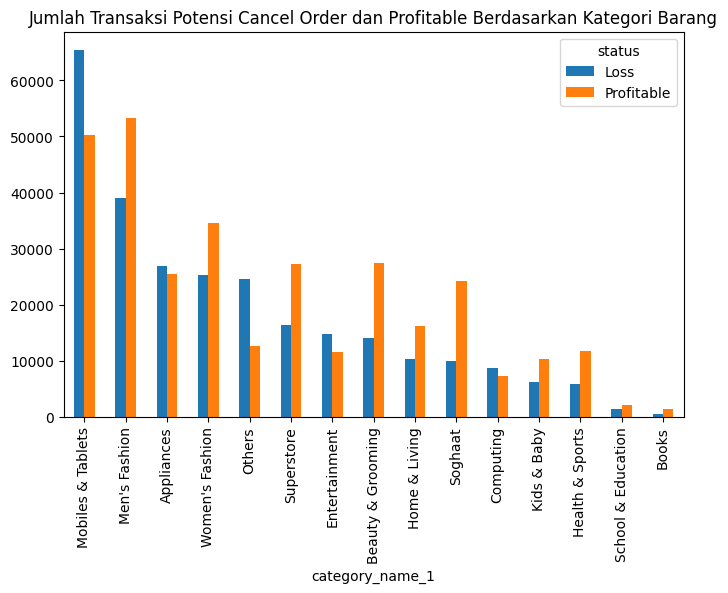

In [29]:
df_ct.sort_values("Loss",ascending=False).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Jumlah Transaksi Potensi Cancel Order dan Profitable Berdasarkan Kategori Barang')
plt.show()

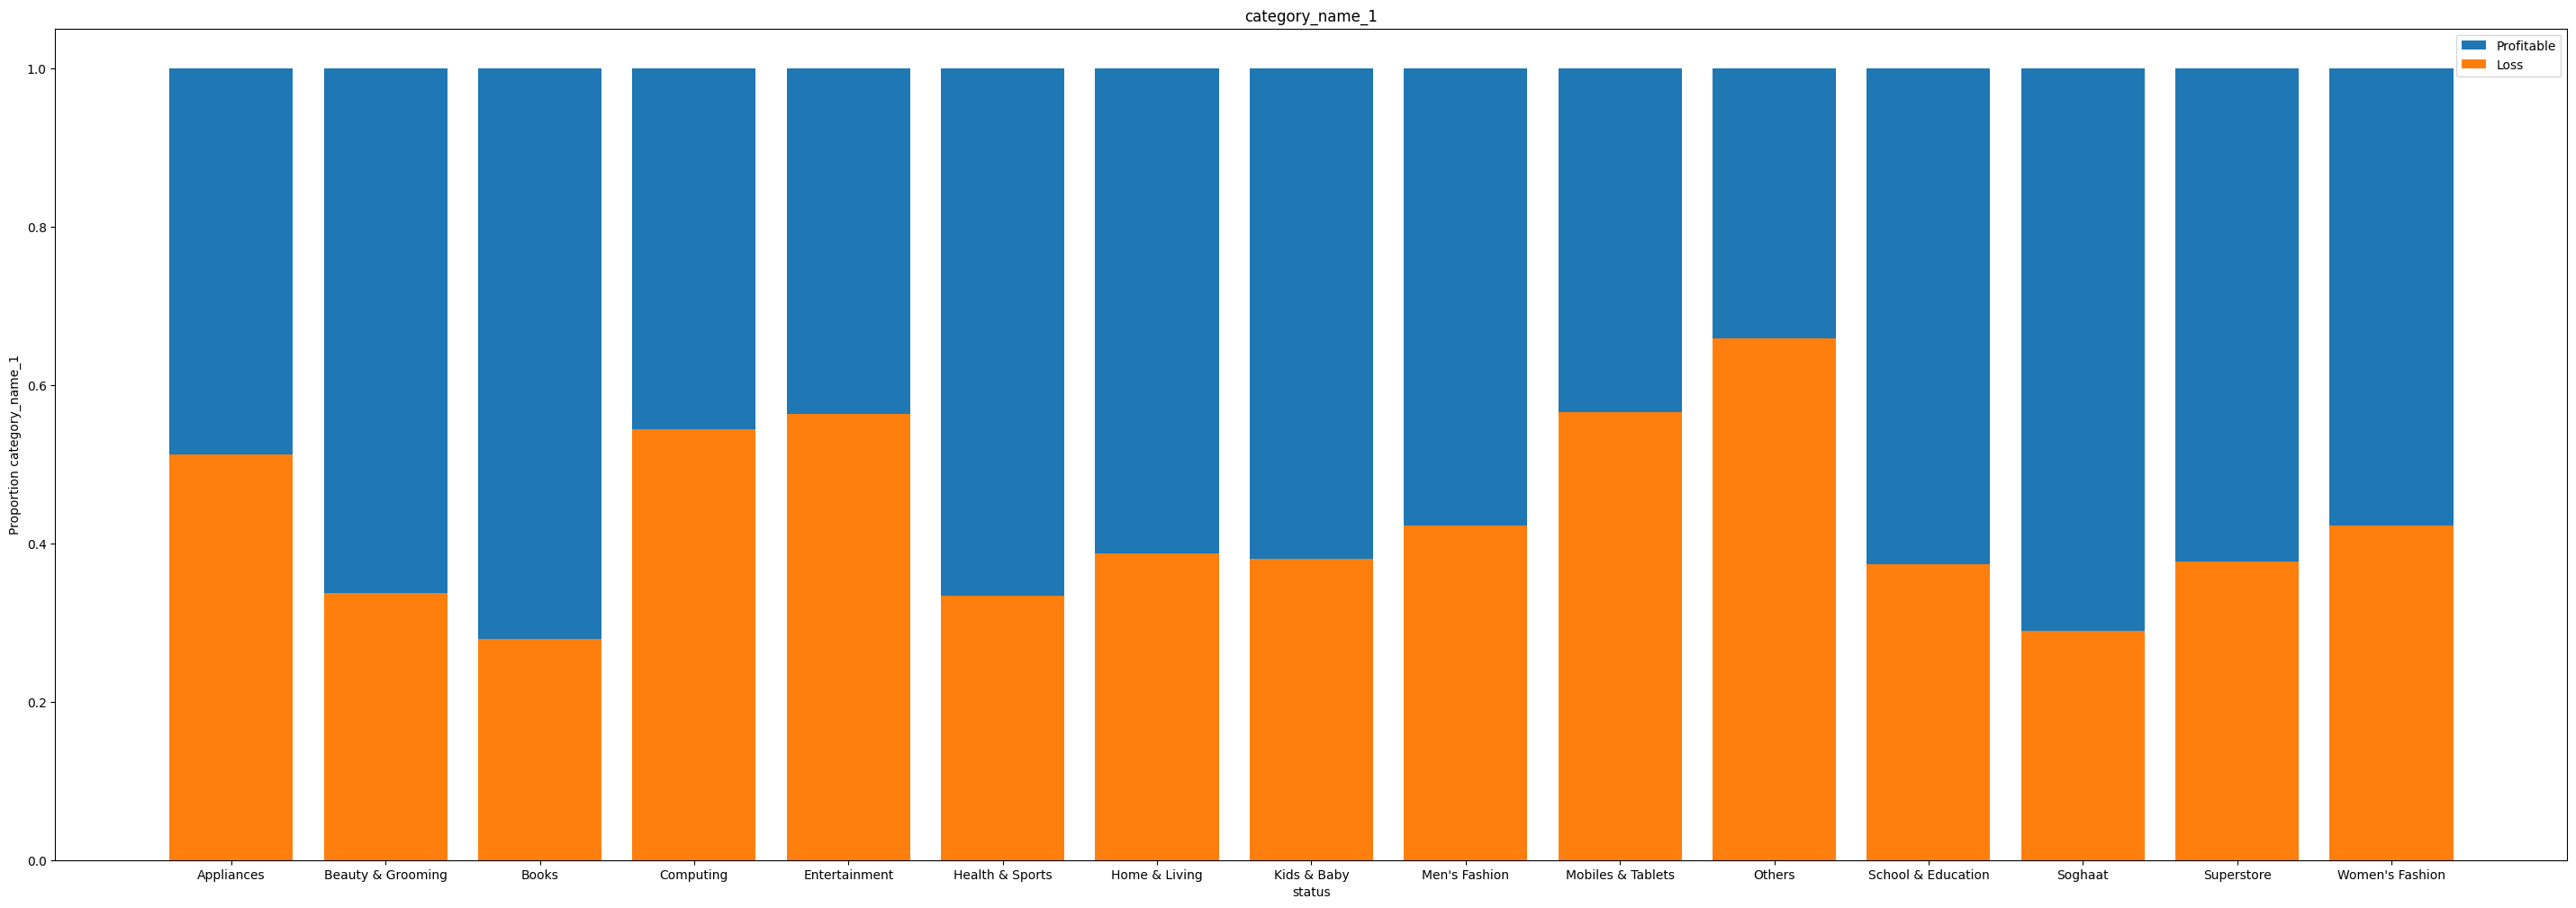

In [30]:
ct=pd.crosstab(df2['category_name_1'],df2['status'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(36,12))
plt.bar(np.arange(df2['category_name_1'].nunique()),ct['total'])
plt.bar(np.arange(df2['category_name_1'].nunique()),ct["Loss"])
plt.xlabel('status')
plt.ylabel(f'Proportion category_name_1')
plt.legend(["Profitable","Loss"])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('category_name_1')
plt.show()

In [31]:
df_ct= pd.crosstab(df2['category_name_1'],df2['status'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Berdasarkan grafik yang ada di atas, kita dapat menjawab pertanyaan berikut:
* Kategori barang apa yang memiliki pembatalan tertinggi?
    **Kita dapat melihat bahwa pembatalan tertinggi terdapat pada Kategori Mobiles & Tablets**, kategori ini nantinya dapat dijadikan sebagai target utama perusahaan dalam mengurangi tingkat pembatalan transaksi.
* Kategori mana yang memiliki transaksi terbanyak?
    **Kategori yang memiliki transaksi terbanyak adalah Mobiles & Tablets**. Selain dengan transaksi terbanyak, kategori ini juga memiliki tingkat pembatalan transaksi terbanyak seperti yang dijelaskan pada pertanyaan pertama.

Uji statistik dengan chi2_contingency juga menunjukkan adanya pengaruh yang signifikan dari variable category_name_1 terhadap variable status.

## Berdasarkan Commission Code / Kode Referral : `sales_commission_code` vs `status`  

Sekarang kita akan mencoba menguji apakah ada pengaruh dari penggunaan kode referral / commission code terhadap tingkat pembatalan user pada transaksi.

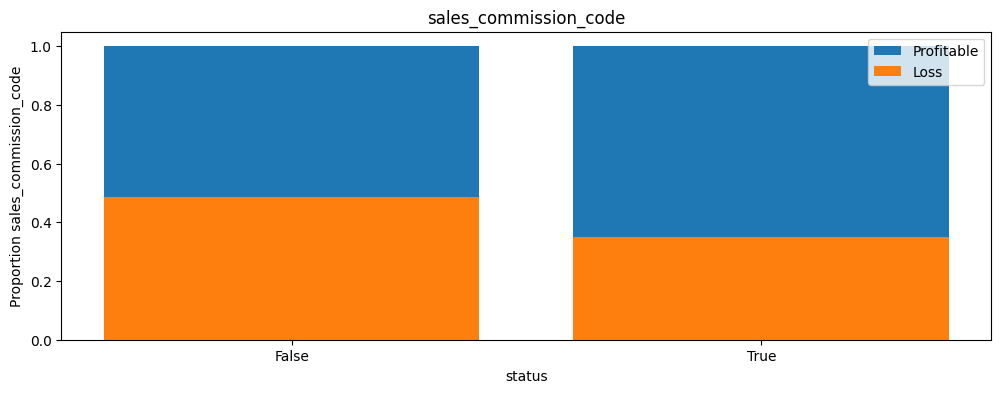

In [32]:
ct=pd.crosstab(df2['sales_commission_code'],df2['status'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.bar(np.arange(df2['sales_commission_code'].nunique()),ct['total'])
plt.bar(np.arange(df2['sales_commission_code'].nunique()),ct["Loss"])
plt.xlabel('status')
plt.ylabel(f'Proportion sales_commission_code')
plt.legend(["Profitable","Loss"])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('sales_commission_code')
plt.show()

In [33]:
from statsmodels.stats.proportion import proportions_ztest
df_ct=pd.crosstab(df2['sales_commission_code'],df2['status'])

stats, pval=proportions_ztest(df_ct["Loss"],df_ct.sum(axis=1),alternative='smaller') 
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Gagal menolak Ho


Dari grafik dan uji statistik diatas kita dapat memahami bahwa tingkat pembatalan antara penggunaan referral code dan tidak hampir sama. Uji statistik juga menghasilkan tidak ada pengaruh signifikan dari penggunaan referral code ataupun tidak. Jadi perusahaan tidak perlu memperhatikan variable ini sebagai pertimbangan dalam bertindak untuk mengurangi tingkat pembatalan transaksi oleh user. 

## Berdasarkan Ada atau Tidaknya Discount : `discount_amount` vs `status`  

Samad dengan variable sales_commission_code, kita akan menguji apakah variable discount_amount memiliki pengaruh terhadap variable status.

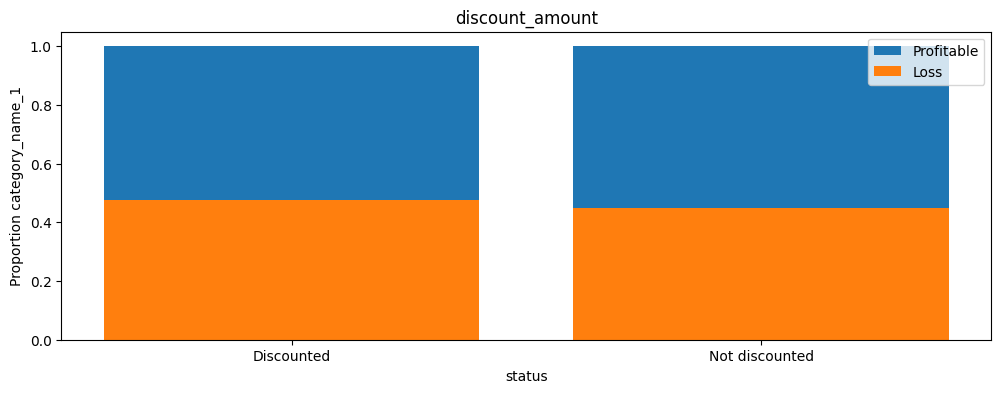

In [34]:
ct=pd.crosstab(df2['discount_amount'],df2['status'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.bar(np.arange(df2['discount_amount'].nunique()),ct['total'])
plt.bar(np.arange(df2['discount_amount'].nunique()),ct["Loss"])
plt.xlabel('status')
plt.ylabel(f'Proportion category_name_1')
plt.legend(["Profitable","Loss"])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('discount_amount')
plt.show()

In [35]:
from statsmodels.stats.proportion import proportions_ztest
df_ct=pd.crosstab(df2['discount_amount'],df2['status'])

stats, pval=proportions_ztest(df_ct["Loss"],df_ct.sum(axis=1),alternative='smaller') 
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Gagal menolak Ho


Dari grafik dan uji statistik diatas kita dapat memahami bahwa tingkat pembatalan antara penggunaan referral code dan tidak hampir sama. Grafik ini hampir mirip dengan grafik pada uji sales_commission_code dimana Uji statistiknya juga menghasilkan bahwa tidak ada pengaruh signifikan dari adanya diskon pada transksi ataupun tidak. Jadi perusahaan tidak perlu memperhatikan variable ini sebagai pertimbangan dalam bertindak untuk mengurangi tingkat pembatalan transaksi oleh user. 

## Berdasarkan Metode Pembayaran Transaksi : `payment_method` vs `status`  

Pertama, mari kita lihat bagaimana pengaruh metode pembayaran terhadap jumlah pembatalan yang terjadi. Kita akan menganalisis kolom  `paymen_method` untuk mengetahui beberapa pertanyaan berikut.

* Metode pembayaran apa yang memiliki pembatalan tertinggi?
* Metode pembayaran mana yang memiliki transaksi terbanyak?
* Apakah terdapat pengaruh yang signifikan dari varibale payment_method terhadap variable status?

In [36]:
df_ct2=pd.crosstab(df2['payment_method'],df2['status'])
df_ct2['Total']=df_ct2.sum(axis=1)
df_ct2.sort_values('Total',ascending=False)

status,Loss,Profitable,Total
payment_method,,,
cod,76101,195816,271917
Payaxis,65654,31986,97640
Easypay,55389,27507,82896
jazzwallet,18061,17084,35145
easypay_voucher,12943,18233,31176
bankalfalah,17124,5940,23064
jazzvoucher,9013,6620,15633
Easypay_MA,9668,4359,14027
customercredit,1542,6013,7555


In [37]:
df_ct2.sort_values("Loss",ascending=False)

status,Loss,Profitable,Total
payment_method,,,
cod,76101,195816,271917
Payaxis,65654,31986,97640
Easypay,55389,27507,82896
jazzwallet,18061,17084,35145
bankalfalah,17124,5940,23064
easypay_voucher,12943,18233,31176
Easypay_MA,9668,4359,14027
jazzvoucher,9013,6620,15633
customercredit,1542,6013,7555


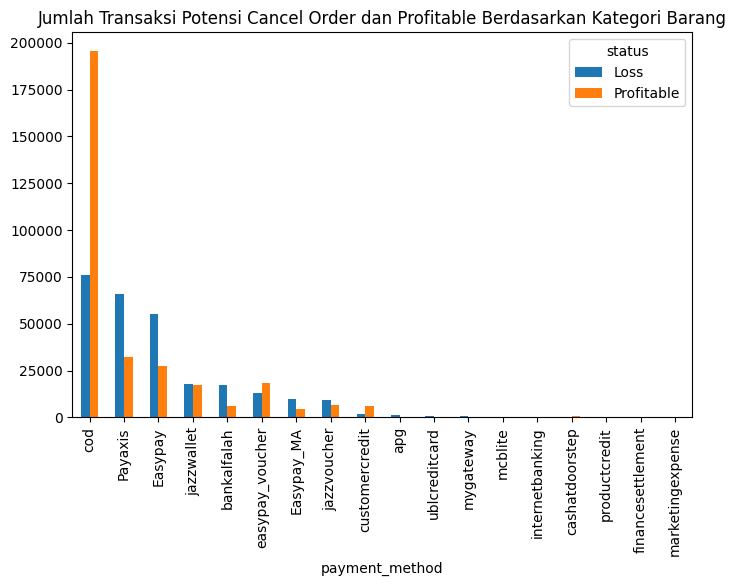

In [38]:
df_ct2.sort_values("Loss",ascending=False).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Jumlah Transaksi Potensi Cancel Order dan Profitable Berdasarkan Kategori Barang')
plt.show()

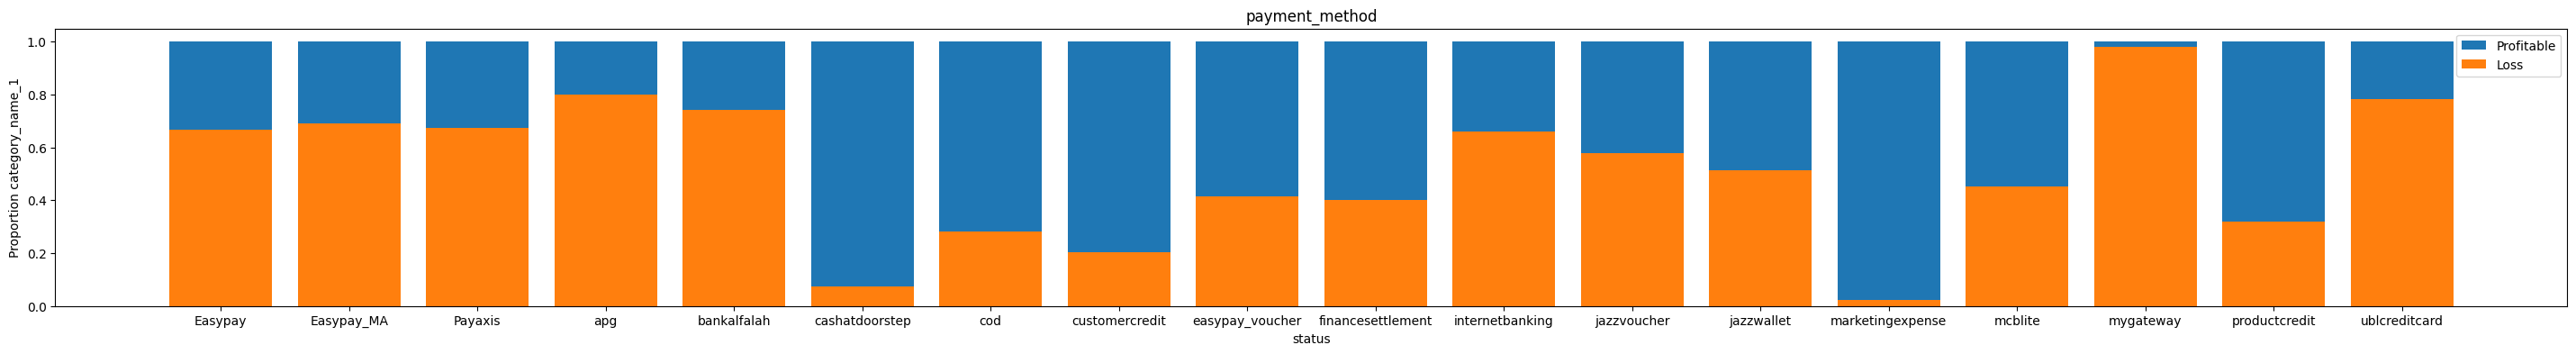

In [39]:
ct2=pd.crosstab(df2['payment_method'],df2['status'],normalize='index').sort_index()
ct2['total']=ct2.sum(axis=1)
plt.figure(figsize=(36,4))
plt.bar(np.arange(df2['payment_method'].nunique()),ct2['total'])
plt.bar(np.arange(df2['payment_method'].nunique()),ct2["Loss"])
plt.xlabel('status')
plt.ylabel(f'Proportion category_name_1')
plt.legend(["Profitable","Loss"])
plt.xticks(np.arange(len(ct2.index.tolist())),ct2.index.tolist())
plt.title('payment_method')
plt.show()

In [40]:
df_ct= pd.crosstab(df2['payment_method'],df2['status'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Berdasarkan grafik-grafik yang ada di atas, kita dapat menjawab pertanyaan berikut:
* Metode pembayaran apa yang memiliki pembatalan tertinggi?
    **Kita dapat melihat bahwa pembatalan tertinggi terdapat pada metode COD, Payaxis, Easypay**, metode metode ini nantinya dapat dijadikan sebagai target utama perusahaan dalam mengurangi tingkat pembatalan transaksi.
* Metode pembayaran mana yang memiliki transaksi terbanyak?
    **Kategori yang memiliki transaksi terbanyak adalah COD, Payaxis, Easypay**. Selain dengan transaksi terbanyak, metode-metode ini juga memiliki tingkat pembatalan transaksi terbanyak seperti yang dijelaskan pada pertanyaan pertama.
* Apakah terdapat pengaruh yang signifikan dari variable payment_method terhadap variable status?
    Uji statistik dengan chi2_contingency juga menunjukkan adanya pengaruh yang signifikan dari variable payment_method terhadap variable status.


# Kesimpulan

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang tingkat pembatalan yang dilakukan oleh user:
* Dari 584,474 data yang kita miliki, ada 268,985 (46%) data transaksi yang memiliki potensi pembatalan oleh user.
* Berdasarkan kategori barang, transaksi batal paling banyak terjadi pada kategori Mobiles & Tablets
* Berdasarkan metode pembayaran, transaksi batal paling banyak terjadi pada metode COD, Payaxis, dan Easypay.
* Penggunaan referral code / commission code tidak memiliki pengaruh yang signifikan dalam pembatalan transaksi oleh user.
* Penggunaan discount juga tidak memiliki pengaruh yang signifikan dalam pembatalan transaksi oleh user.

# Rekomendasi

1. Perusahaan dapat menetapkan target berdasarkan kategori barang terlebih dahulu, dengan kategori Mobiles & Tablets sebagai target utama karena kategori ini memiliki jumlah transaksi terbanyak dan juga tingkat pembatalan oleh user yang terbanyak.

2. Lalu jika diperiksa berdasarkan metode pembayaran, pembatalan paling banyak terjadi pada metode COD, Payaxis, dan Easypay. Berdasarkan domain knowledge, pada case COD biasanya transaksi dapat batal karena jarak yang terlalu jauh atau barang yang diterima oleh user tidak sesuai sehingga user membatalkan transaksi tersebut dan lanjut mengajukan complain.
Hal ini bisa diatasi dengan meningkatkan akurasi gambar dengan barang actualnya, atau meningkatkan kualitas tiap penjual barang dalam memasarkan dagangannya.

3. Untuk meningkatkan tingkat akurasi gambar barang dengan actualnya, dapat diterapkan metode review oleh user yang sudah membeli sebuah barang. Ini dapat menjadi referensi bagi user lainnya saat membeli sebuah barang. Untuk meningkatkan daya review semua user, perusahaan juga dapat membuat sebuah sistem point atau badges. Misal semakin banyak user mereview, maka mereka dapat mendapatkan point dimana point ini dapat digunakan user untuk berbagai manfaat pada platform e-commerce perusahaan.

4. Sedangkan untuk metode Payaxis dan Easypay, dimana ini merupakan metode pembayaran secara online, kita dapat berasumsi bahwa pembatalan bisa jadi disebabkan oleh sering terjadinya gangguan pada Payaxis dan Easypay itu sendiri sehingga user terpaksa harus membatalkan transaksi. Untuk lebih jauhnya, perusahaan dapat menulusuri lebih dalam performa dari kedua metode pembayaran oleh Payaxis dan Easypay dan juga meningkatkan pelayanan dengan menambahkan fitur feedback untuk metode pembayaran online sehingga perusahaan dapat mengambil langkah lebih akurat kedepannya untuk meningkatkan rating complete order.
 
5. Perusahaan juga tidak perlu berfokus pada memberikan discount atau marketing dengan penggunaan referral code, karena hal ini tidak terlalu mempengaruhi keputusan user dalam menyelesaikan ataupun membatalkan sebuah transaksi.

In [46]:
'''df2.to_excel('Cleaned Pakistan Largest Ecommerce Dataset.xlsx')'''
'''https://public.tableau.com/app/profile/donny.septian/viz/CapstoneProjectModule02JCDSOL-009-057Donny/Story1?publish=yes'''